# Uber case Study


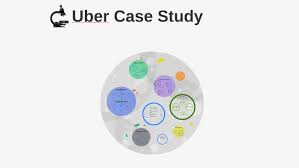

In [304]:
from IPython.display import Image
Image(filename='download.jpg',width=800, height=400)

### Import Statements

In [367]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
  

In [368]:
df_csv=pd.read_csv("Uber Request Data.csv")
df_csv.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [369]:
df_csv.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [370]:
df_csv.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


# Cleaning Dates

In [371]:
df_csv['Drop timestamp'] = pd.to_datetime(df_csv["Drop timestamp"])

df_csv['Request timestamp'] = pd.to_datetime(df_csv["Request timestamp"])

In [372]:
null_columns=df_csv.columns[df_csv.isnull().any()]
count=df_csv[null_columns].isnull().sum()
df_driver_null,df_Drop_timestamp_null=count['Driver id'], count['Drop timestamp']
df_driver_null, df_Drop_timestamp_null


(2650, 3914)

## Driver with the max trips

In [373]:



driver_with_max_trip = pd.DataFrame(df_csv.groupby(['Driver id']).count()['Drop timestamp'])

driver_with_max_trip['Number of trips']=driver_with_max_trip['Drop timestamp']

df=driver_with_max_trip.sort_values(by='Drop timestamp', ascending=False)

print("Driver with most trip and and Number of trips")
df.head(1)

Driver with most trip and and Number of trips


,Drop timestamp,Number of trips
Driver id,,
22.0,16,16


## Percentage cancellation of trips at airport

In [374]:

df_Cancelled_cars=pd.DataFrame(df_csv.where(df_csv['Pickup point']=='Airport').groupby(['Status']).count()['Driver id'])

df_Cancelled_cars

,Driver id
Status,
Cancelled,198
No Cars Available,0
Trip Completed,1327


In [375]:
total=df_csv.shape[0]

total


6745

In [376]:
l=pd.DataFrame(df_Cancelled_cars.where(df_Cancelled_cars['Driver id']==198))

cancelled=int(l.max())
cancelled

198

In [377]:

df_Cancelled_cars['perc']= df_Cancelled_cars['Driver id']/df_Cancelled_cars['Driver id'].sum()*100
print("Percentage cancellation of trips at airport")
df_Cancelled_cars

Percentage cancellation of trips at airport


,Driver id,perc
Status,,
Cancelled,198,12.983607
No Cars Available,0,0.000000
Trip Completed,1327,87.016393


## WeekDay on which maximum number of requests gets a ‘Not available’ status in the city. Also provide the number of such requests on that day.

In [378]:
df_csv['weekday']=df_csv['Request timestamp'].dt.day
df_max_request=pd.DataFrame(df_csv.where((df_csv['Pickup point']=='City')).groupby(['weekday']).count()['Request id'])
df_max_request['Num_of_request']=df_max_request['Request id']
df_max_request

,Request id,Num_of_request
weekday,,
7.0,1329,1329
13.0,674,674
14.0,752,752
15.0,752,752


In [379]:
df_max_req=df_max_request.sort_values(by='Request id', ascending=False)

print("WeekDay on which maximum number of requests gets a ‘Not available’ status in the city. Also provide the number of such requests on that day.")
df_max_req.head(1)

WeekDay on which maximum number of requests gets a ‘Not available’ status in the city. Also provide the number of such requests on that day.


,Request id,Num_of_request
weekday,,
7.0,1329,1329


## Supply vs Demand Curve

In [439]:
#sorting the data by the request id

df_csv=df_csv.sort_values(by='Request id', ascending=True)

df_csv.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,weekday,time,time_slots
2700,1,Airport,285.0,Trip Completed,2016-11-07 00:20:00,2016-11-07 00:51:00,7,0,0am-4am
4098,2,Airport,NaN,No Cars Available,2016-11-07 00:23:00,NaT,7,0,0am-4am
776,3,Airport,80.0,Trip Completed,2016-11-07 00:24:00,2016-11-07 01:31:00,7,0,0am-4am
4101,4,City,NaN,No Cars Available,2016-11-07 00:37:00,NaT,7,0,0am-4am
2506,5,Airport,264.0,Trip Completed,2016-11-07 00:36:00,2016-11-07 01:35:00,7,0,0am-4am


In [440]:
df_csv['time']=df_csv['Request timestamp'].dt.hour

In [441]:
df_csv['time'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [442]:
df_csv['time_slots']=df_csv['time'].apply(lambda x : '0am-4am' if 0<=x<=4 else '4am-8am' 
                                          if 4<x<=8 else '8am-12am'
                                          if 8<x<=12 else '12am-16am'
                                          if 12<x<=16 else '16am-20am'
                                          if 16<x<=20 else '20am-23pm'                                          
                                         )

df_csv['time_slots'].unique()

array(['0am-4am', '4am-8am', '8am-12am', '12am-16am', '16am-20am',
       '20am-23pm'], dtype=object)

In [443]:
df_supply_demand=pd.DataFrame(df_csv.groupby(['time_slots']).count()['Request id'])
df_supply_demand=df_supply_demand.sort_values(by='Request id', ascending=False)
df_supply_demand.head()

,Request id
time_slots,
16am-20am,1893
4am-8am,1672
8am-12am,1029
20am-23pm,947
12am-16am,626


In [444]:
df_supply_demand=df_supply_demand.sort_values(['Request id'])
df_supply_demand['time_slots'] = df_supply_demand.index
df_supply_demand

,Request id,time_slots
time_slots,,
0am-4am,578,0am-4am
12am-16am,626,12am-16am
20am-23pm,947,20am-23pm
8am-12am,1029,8am-12am
4am-8am,1672,4am-8am
16am-20am,1893,16am-20am


In [445]:
df_supply_demand.reset_index(drop=True, inplace=True)
df_supply_demand.shape[0]

6

Text(0.5,1,'Supply vs Demand')

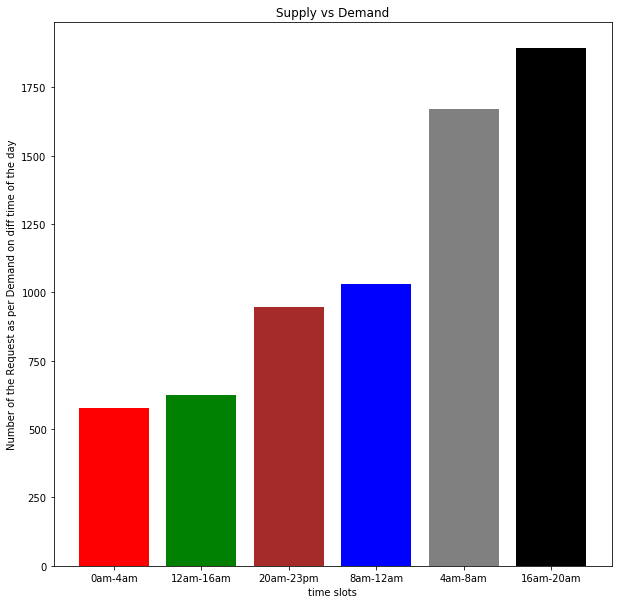

In [446]:
plt.figure(figsize=(10,10))
plt.bar(df_supply_demand['time_slots'],df_supply_demand['Request id'],color=['red','green','brown','blue','grey','black'])
plt.ylabel("Number of the Request as per Demand on diff time of the day")
plt.xlabel("time slots")
plt.title("Supply vs Demand")

In [470]:
df_csv['type_of_request']=df_csv['Pickup point'].apply(lambda x : 'Airport-City' if x=='Airport' else 'City-Airport' 
                                          
                                                                                   
                                         )

df_csv['type_of_request'].unique()


array(['Airport-City', 'City-Airport'], dtype=object)

In [471]:
df_supply_demand=pd.DataFrame(df_csv.groupby(['time_slots','Pickup point']).count()['type_of_request'])
df_supply_demand=df_supply_demand.sort_values(by='type_of_request', ascending=False)
df_supply_demand.head()

,,type_of_request
time_slots,Pickup point,
16am-20am,Airport,1457
4am-8am,City,1335
8am-12am,City,714
20am-23pm,Airport,624
16am-20am,City,436


In [480]:
df_supply_demand=df_supply_demand.sort_values(['type_of_request'])

df_supply_demand

,,type_of_request
time_slots,Pickup point,
12am-16am,Airport,252
0am-4am,Airport,253
8am-12am,Airport,315
20am-23pm,City,323
0am-4am,City,325
4am-8am,Airport,337
12am-16am,City,374
16am-20am,City,436
20am-23pm,Airport,624
